In [1]:
# import the packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd



ModuleNotFoundError: No module named 'geopandas'

# 1 Import data

In [2]:
# import the data into pandas dataframes
hvc_am0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_AM0.csv", sep=";")
hvc_ar0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_AR0.csv", sep=";")
hvc_customer_reviews = pd.read_csv("../ACRM-GROUP-13/data/HVC_CUSTOMER_REVIEWS.csv", sep=";")
hvc_depot = pd.read_csv("../ACRM-GROUP-13/data/HVC_DEPOT.csv", sep=";")
hvc_hvdayofweek = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVDAYOFWEEK.csv", sep=";")
hvc_hvposition = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVPOSITION.csv", sep=";")
hvc_hvroutetemplate = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVROUTETEMPLATE.csv", sep=";")
hvc_hvvisitoutcome = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVVISITOUTCOME.csv", sep=";")
hvc_hvvisitresult = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVVISITRESULT.csv", sep=";")
hvc_so0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_SO0.csv", sep=";")
hvc_visitresultdetails = pd.read_csv("../ACRM-GROUP-13/data/HVC_VISITRESULTDETAILS.csv", sep=";")

In [3]:
#Data conversion
hvc_hvdayofweek["HVDAYOFWEEK_NRID"] = hvc_hvdayofweek["HVDAYOFWEEK_NRID"].astype(int)
hvc_hvroutetemplate["HVROUTETEMPLATE_NRID"] = hvc_hvroutetemplate["HVROUTETEMPLATE_NRID"].astype(int)
hvc_hvroutetemplate["HVDAYOFWEEK_NRID"] = hvc_hvroutetemplate["HVDAYOFWEEK_NRID"].astype(int)
hvc_hvroutetemplate["WEEKORDER"] = hvc_hvroutetemplate["WEEKORDER"].astype(int)
hvc_hvvisitoutcome["HVOUTCOME_NRID"] = hvc_hvvisitoutcome["HVOUTCOME_NRID"].astype(int)
hvc_visitresultdetails["HVVISITRESULT_NRID"] = hvc_visitresultdetails["HVVISITRESULT_NRID"].astype(int)
hvc_so0["SO0_NRID"] = hvc_so0["SO0_NRID"].astype(int)
hvc_so0["HVROUTETEMPLATE_NRID"] = hvc_so0["HVROUTETEMPLATE_NRID"].astype(int)
hvc_hvvisitresult["DATEONLY"] = pd.to_datetime(hvc_hvvisitresult["DATEONLY"])
hvc_hvvisitresult["VISITDATE"] = pd.to_datetime(hvc_hvvisitresult["VISITDATE"])

## 2 Explore the Data

## 2.1 hvc_customer_reviews

In [ ]:
# inspect table
hvc_customer_reviews

In [ ]:
# inspect the first 5 reviews
hvc_customer_reviews.head(5)

In [ ]:
# inspect the total number of reviews
len(hvc_customer_reviews["SO0_NRID"].unique())

In [ ]:
# checking dtypes
hvc_customer_reviews.dtypes

In [ ]:
# checking kind of reviews
pd.unique(hvc_customer_reviews["REVIEW"])

In [ ]:
# inspect some descriptive statistics with respect to the transaction amount
hvc_customer_reviews["REVIEW"].describe()

In [ ]:
# proportion of good or excellent reviews
sum((hvc_customer_reviews["REVIEW"] == "Good service, satisfied") + (hvc_customer_reviews["REVIEW"] == "Excellent service, very satisfied")) / len(hvc_customer_reviews)

In [ ]:
# proportion of excellent reviews
sum((hvc_customer_reviews["REVIEW"] == "Excellent service, very satisfied")) / len(hvc_customer_reviews)



In [ ]:
# proportion of good reviews
sum((hvc_customer_reviews["REVIEW"] == "Good service,  satisfied")) / len(hvc_customer_reviews)

In [ ]:
# proportion of terrible reviews
sum((hvc_customer_reviews["REVIEW"] == "Very bad service, very unsatisfied")) / len(hvc_customer_reviews)

## 2.2 hvc_hvpostition

In [ ]:
# customer position
hvc_hvposition

In [ ]:
# inspect first 5 observations of customer location
hvc_hvposition.head(5)

In [ ]:
# inspect last 5 observations of customer location
hvc_hvposition.tail(5)

In [ ]:
# total number of locations of unique customers
len(hvc_hvposition["SO0_NRID"].unique())

In [ ]:
# more locations then customers
len(hvc_hvposition["SO0_NRID"].unique()) > len(hvc_so0["SO0_NRID"].unique())


## 2.3 hvc_so0_nrid

In [ ]:
# inspect first 5 observations of customers
hvc_so0.head(5)

In [ ]:
# inspect last 5 observations of customers
hvc_so0.tail(5)

In [ ]:
# inspect total number of unique customers
len(hvc_so0["SO0_NRID"].unique())

In [ ]:
# get some descriptive statistics with respect to the spoken language as well as the season type of the customers
hvc_so0[["LANGUAGE", "SEASON_TYPE"]].describe()

In [ ]:
# get the counts for every season type
hvc_so0["SEASON_TYPE"].value_counts()

In [ ]:
# get the counts for every spoken language
hvc_so0["LANGUAGE"].value_counts()

In [20]:
# get the counts for customer type
hvc_so0["CUST_TYPE"].value_counts()

Private     5579
Horeca        97
Catering      33
Name: CUST_TYPE, dtype: int64

# 3 Analysis

## 3.1 Customer locations

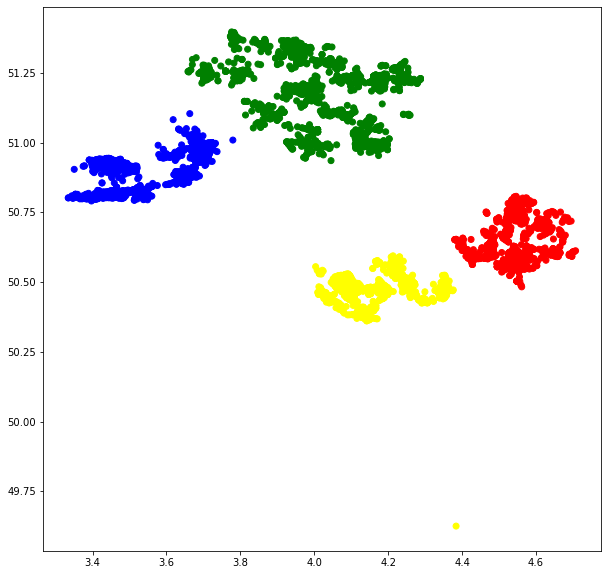

In [107]:
### Clustering the customer positions

## Clustering the longitude and latitude

from sklearn.cluster import KMeans
plt.figure(figsize = (10,10))

# initialize the cluster algorithm with 4 classes
kmeans_model = KMeans(n_clusters=4)

# fit the kmeans model onto the data
kmeans_model.fit(hvc_hvposition[["LONG","LAT"]])

# get all the cluster labels
cluster_labels = kmeans_model.labels_

# define color map
color_map = {0: "green", 1: "red", 2: "blue", 3: "yellow"}

# get colors for each cluster label
cluster_colors = [color_map[label] for label in cluster_labels]

# plot data with cluster colors
plt.scatter(hvc_hvposition["LONG"], hvc_hvposition["LAT"], color=cluster_colors)
plt.show()

In [108]:
# adding a map
belgium = gpd.read_file("./data/Arrondissementen.json")
crs = 'epsg:4326'
base = belgium.plot(color='white', edgecolor='black', figsize = (20,20))
gdf = gpd.GeoDataFrame(hvc_hvposition, crs = crs,geometry=gpd.points_from_xy(hvc_hvposition["LONG"], hvc_hvposition["LAT"]))


gdf.plot(ax = base, color = "red",markersize = 10)

plt.show()

NameError: name 'gpd' is not defined

## 3.2 What do the  customers buy? 

In [4]:
customer_id = 721110.0

In [5]:
# join transactions with transaction details with products
transactions_products = hvc_hvvisitresult.merge(hvc_visitresultdetails, on="HVVISITRESULT_NRID", how="inner")\
                                         .merge(hvc_ar0, on="AR0_NRID", how="inner") 

In [6]:
# check
transactions_products.head(3)

,HVVISITRESULT_NRID,SO0_NRID,AM0_NRID,HVOUTCOME_NRID,VISITDATE,DATEONLY,AMOUNT,PAYMENTTERM,VISITRESULTDETAILS_NRID,AR0_NRID,QUANTITY,DESCRIPTION,CATEGORY,FAMILY,PRICE
0,55681456,719952,23186288605042,2,2021-10-24 12:20:01,2019-05-06,16.9,cash,55681457,23678,1.0,"2,5 L.Vanille",Verkoopsartikel,Scoop Ice,7.4
1,55681507,1453609,19946584592834,2,2021-10-24 12:13:50,2019-05-06,7.4,cash,55681508,23678,1.0,"2,5 L.Vanille",Verkoopsartikel,Scoop Ice,7.4
2,55714770,1246568,18934048107254,2,2021-10-24 22:08:39,2019-05-06,11.1,cash,55714771,23678,1.0,"2,5 L.Vanille",Verkoopsartikel,Scoop Ice,7.4


In [7]:
# get all the transactions for customer
transactions_products_customer = transactions_products[transactions_products["SO0_NRID"] == customer_id]

# get all transactions with positive outcome
transactions_products_customer = transactions_products_customer[transactions_products_customer["HVOUTCOME_NRID"] == 2]

In [8]:
# get total number of products bought by the customer
transactions_products_customer["QUANTITY"].sum()

22.0

## 3.3 Unique list of unique products a customer bought

In [ ]:
# define a function that accepts a customer id, the transactions data, transactions details data and product data
def get_products(cust_id, transactions, transaction_details, products):
    

    # join transactions with transaction details with products
    transactions_products = transactions.merge(transaction_details, on="HVVISITRESULT_NRID", how="inner") \
                                        .merge(products, on="AR0_NRID", how="inner")
    
    # get transactions of customer 
    transactions_products_cust = transactions_products[transactions_products["SO0_NRID"] == cust_id]
    
    # only get transactions of succesfull visits
    transactions_products_cust = transactions_products_cust[transactions_products_cust["HVOUTCOME_NRID"] == 2]
    
    # get total amount of products bought by the customer
    total_products = transactions_products_cust["QUANTITY"].sum()
    
    # get total number of unique products bought by the customer
    total_unique_products = len(transactions_products_cust["DESCRIPTION"].unique())
    
    # return
    return(total_products, total_unique_products)

In [ ]:
# check
get_products(cust_id=721110.0, 
                  transactions=hvc_hvvisitresult, 
                  transaction_details=hvc_visitresultdetails, 
                  products=hvc_ar0)

## 3.4 Which customers have the highest CLV?



In [12]:
def get_clv(cust_id):
    
    # get customer transactions
    transactions=hvc_hvvisitresult
    cust_transactions = transactions[transactions["SO0_NRID"] == cust_id]
    # get transactions with positive outcome
    cust_transactions_pos = cust_transactions[cust_transactions["HVOUTCOME_NRID"] == 2]
    # get clv
    clv = np.sum(cust_transactions["AMOUNT"])
    # return clv
    return(clv)

In [13]:
#add a clv column to every customer
all_clv = []
#making a list of clv's 
for i in range(len(hvc_so0)):
    all_clv.append(get_clv(cust_id=hvc_so0.iloc[i,0]))
#add the list to the df
hvc_so0_with_clv = hvc_so0.assign(CLV = all_clv )



In [33]:
# get the counts for customer type
hvc_so0["CUST_TYPE"].value_counts()

Private     5579
Horeca        97
Catering      33
Name: CUST_TYPE, dtype: int64

In [32]:
#sort by clv
hvc_so0_with_clv.sort_values(by="CLV")


,SO0_NRID,HVROUTETEMPLATE_NRID,CUST_TYPE,POSTCODE,LANGUAGE,SEASON_TYPE,CLV
0,721104,219020601,Private,3930,nl-BE,All time,0.0
4487,-2147483648,289759476,Private,3640,nl-BE,All time,0.0
4488,-2147483648,219018687,Private,3950,nl-BE,All time,0.0
4489,-2147483648,289762482,Private,3680,nl-BE,All time,0.0
4490,-2147483648,289419955,Private,3550,nl-BE,All time,0.0
...,...,...,...,...,...,...,...
2387,1455143,289764486,Horeca,3680,nl-BE,All time,6901.1
1281,1250991,289416949,Horeca,3582,nl-BE,All time,7041.7
1973,728498,219018687,Horeca,3950,nl-BE,All time,8503.2
2210,1451799,289762482,Horeca,3640,nl-BE,All time,9938.9


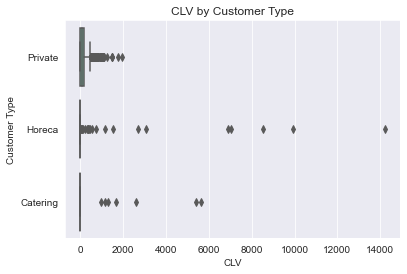

In [34]:
#Boxplot 
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.title('CLV by Customer Type')
sns.boxplot(data=hvc_so0_with_clv, x='CLV', y='CUST_TYPE')
plt.xlabel('CLV')
plt.ylabel('Customer Type')
plt.savefig('Sales by customer type in.png')
plt.show()

In [15]:
#Sales by customer type in a certain year

def sales_by_customer_type(desired_year):

    # get the month of each transaction date and store it in new column
    hvc_hvvisitresult["MONTH"] = hvc_hvvisitresult["DATEONLY"].apply(lambda x: x.month)

    #merge
    transactions_2020 = hvc_hvvisitresult.merge(hvc_so0,on="SO0_NRID", how ="inner")

    # get transactions from 2020 only
    transactions_2020 = transactions_2020[(transactions_2020["DATEONLY"] >= pd.Timestamp(year=desired_year, day=1, month=1)) & (transactions_2020["DATEONLY"] < pd.Timestamp(year=desired_year + 1, month=1, day=1))]

    # get transactions with succesfull outcome
    transactions_2020 = transactions_2020[transactions_2020["HVOUTCOME_NRID"] == 2]


    # get transactions by 'private customers'
    private_transactions_2020 = transactions_2020[transactions_2020["CUST_TYPE"] == "Private"]

    # get the total sales for each month for 'private customers'
    private_monthly_sales = private_transactions_2020.groupby("MONTH")["AMOUNT"].sum().reset_index()

    # get transactions by 'Horeca customers'
    horeca_transactions_2020 = transactions_2020[transactions_2020["CUST_TYPE"] == "Horeca"]

    # get the total sales for each month for 'Horeca customers'
    horeca_monthly_sales = horeca_transactions_2020.groupby("MONTH")["AMOUNT"].sum().reset_index()

    # get transactions by 'Catering customers'
    catering_transactions_2020 = transactions_2020[transactions_2020["CUST_TYPE"] == "Catering"]

    # get the total sales for each month for 'Catering customers'
    catering_monthly_sales = catering_transactions_2020.groupby("MONTH")["AMOUNT"].sum().reset_index()

    # Barplot
    n_months = 12
    fig, ax = plt.subplots()
    index = np.arange(n_months)
    bar_width = 0.20
    opacity = 0.7

    rects1 = plt.bar(index, private_monthly_sales["AMOUNT"], bar_width,
    alpha=opacity,
    color='#FFD57A',
    label='Private')
                                              
    rects2 = plt.bar(index + bar_width, horeca_monthly_sales["AMOUNT"], bar_width,
    alpha=opacity,
    color='#ffb923',
    label='Horeca')

    rects3 = plt.bar(index + 2*bar_width, catering_monthly_sales["AMOUNT"], bar_width,
    alpha=opacity,
    color='#FF9323',
    label='Catering')

    plt.xlabel('Customer type')
    plt.ylabel('Sales')
    plt.title('Sales by customer type in '+str(desired_year))
    plt.xticks(index + bar_width, ('JAN', 'FEB', 'MAR', 'APR', 'MAI', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'))
    plt.legend()
    plt.savefig('Sales by customer type in '+str(desired_year))
    plt.tight_layout()


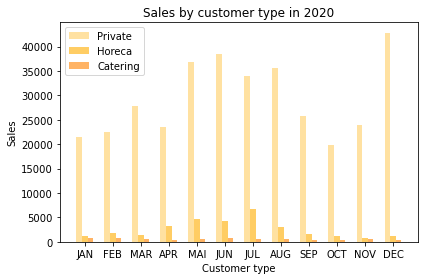

In [16]:
#sales by customer in 2020
sales_by_customer_type(2020)


## 3.5 How often did a customer purchase at the company at different days 

In [ ]:
def get_frequency(cust_id, transactions):
    
    # get transactions made by customer
    transactions_cust = transactions[hvc_hvvisitresult["SO0_NRID"] == cust_id]

    # get transactions from succesfull visits
    transactions_cust = transactions_cust[transactions_cust["HVOUTCOME_NRID"] == 2]

    # get total number of unique days on which customer made a purchase
    frequency = len(transactions_cust)
    
    # return
    return(frequency)

In [ ]:
# check
get_frequency(721110.0)

## 3.6 Which customers left the company?

In [21]:
#Linear regression plots

def get_regression_sales(customer_id, year_regression):
    
    #get the month of each transaction date and store it in new column
    hvc_hvvisitresult["MONTH"] = hvc_hvvisitresult["DATEONLY"].apply(lambda x: x.month)

    #merge
    transactions = hvc_hvvisitresult.merge(hvc_so0,on="SO0_NRID", how ="inner")
    
    #get transactions from desired_year
    transactions = transactions[(transactions["DATEONLY"] >= pd.Timestamp(year=year_regression, day=1, month=1)) & (transactions["DATEONLY"] < pd.Timestamp(year=year_regression + 1, month=1, day=1))]

    #get transactions with succesfull outcome
    transactions = transactions[transactions["HVOUTCOME_NRID"] == 2]
    
    #get transactions from customer with specific id 
    transactions_unique_cust = transactions[transactions["SO0_NRID"] == customer_id ]
    
    # get the total sales for each month for customers
    sales_unique_cust = transactions_unique_cust.groupby("MONTH")["AMOUNT"].sum().reset_index() 
    print(sales_unique_cust)
    sales_unique_cust_fixed = sales_unique_cust
    sales_unique_cust_fixed["MONTH"] = sales_unique_cust["MONTH"]-1
    
    
    g = sns.lmplot(x="MONTH", y="AMOUNT", data=sales_unique_cust_fixed, fit_reg=True, line_kws={'color': '#ffb923'}, scatter_kws={'color': '#ffb923'})
    
    g.set(ylim=(0, None))
    plt.xlabel("Months")
    plt.ylabel("Sales")
    plt.title("Sales of Customer " + str(customer_id) + " in " + str(year_regression))
    plt.xticks(range(12), ('JAN', 'FEB', 'MAR', 'APR', 'MAI', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'))
    plt.tight_layout()
    plt.savefig('./Graphs/regression.png')
    return plt.show()

   MONTH  AMOUNT
0      2    47.1
1      3    49.0
2      5    15.0
3      6    22.6
4      8    39.9
5      9    24.7
6     10    14.9
7     11     7.6
8     12     7.6


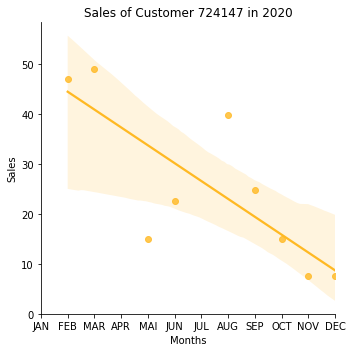

In [22]:
# Regression test
get_regression_sales(customer_id=724147, year_regression=2020)

In [30]:
#LINEAR REGRESSION MODEL

#merge
transactions = hvc_hvvisitresult.merge(hvc_so0,on="SO0_NRID", how ="inner")

#get transactions with succesfull outcome
transactions = transactions[transactions["HVOUTCOME_NRID"] == 2]

transactions
    

,HVVISITRESULT_NRID,SO0_NRID,AM0_NRID,HVOUTCOME_NRID,VISITDATE,DATEONLY,AMOUNT,PAYMENTTERM,MONTH,HVROUTETEMPLATE_NRID,CUST_TYPE,POSTCODE,LANGUAGE,SEASON_TYPE
0,55681456,719952,23186288605042,2,2021-10-24 12:20:01,2019-05-06,16.9,cash,5,219019962,Private,3950,nl-BE,All time
1,55248854,719952,23186288605042,2,2021-10-24 12:46:43,2019-04-22,7.4,cash,4,219019962,Private,3950,nl-BE,All time
2,54761459,719952,23186288605042,2,2021-10-24 12:32:05,2019-04-08,7.4,cash,4,219019962,Private,3950,nl-BE,All time
4,54354469,719952,23186288605042,2,2021-10-24 17:14:48,2019-03-25,16.9,cash,3,219019962,Private,3950,nl-BE,All time
7,52658514,719952,23186288605042,2,2021-10-24 11:43:41,2019-01-28,7.4,cash,1,219019962,Private,3950,nl-BE,All time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178650,73690180,72836526,25146868694050,2,2021-10-24 12:48:34,2020-12-19,12.1,cash,12,219021882,Private,3930,nl-BE,All time
178653,73056077,72857601,24034952445848,2,2021-10-24 17:08:19,2020-12-01,3.7,cash,12,289658600,Private,3500,nl-BE,All time
178655,73495755,1398687,24034952445848,2,2021-10-24 08:41:10,2020-12-14,9.9,cash,12,289657598,Private,3500,nl-BE,All time
178657,73626203,727026,25146868694050,2,2021-10-24 11:32:12,2020-12-16,21.0,cash,12,219021241,Private,3910,nl-BE,All time


In [31]:
#imputing missing vallues 
for col in transactions.columns:
    # get number of missing values for column
    num_miss = sum(transactions[col].isnull())
    # print
    print(col, num_miss)

HVVISITRESULT_NRID 0
SO0_NRID 0
AM0_NRID 0
HVOUTCOME_NRID 0
VISITDATE 0
DATEONLY 0
AMOUNT 0
PAYMENTTERM 1319
MONTH 0
HVROUTETEMPLATE_NRID 0
CUST_TYPE 0
POSTCODE 0
LANGUAGE 0
SEASON_TYPE 1


In [47]:
transactions

,HVVISITRESULT_NRID,SO0_NRID,AM0_NRID,HVOUTCOME_NRID,VISITDATE,DATEONLY,AMOUNT,MONTH,HVROUTETEMPLATE_NRID,CUST_TYPE,POSTCODE,LANGUAGE
0,55681456,719952,23186288605042,2,2021-10-24 12:20:01,2019-05-06,16.9,5,219019962,Private,3950,nl-BE
1,55248854,719952,23186288605042,2,2021-10-24 12:46:43,2019-04-22,7.4,4,219019962,Private,3950,nl-BE
2,54761459,719952,23186288605042,2,2021-10-24 12:32:05,2019-04-08,7.4,4,219019962,Private,3950,nl-BE
4,54354469,719952,23186288605042,2,2021-10-24 17:14:48,2019-03-25,16.9,3,219019962,Private,3950,nl-BE
7,52658514,719952,23186288605042,2,2021-10-24 11:43:41,2019-01-28,7.4,1,219019962,Private,3950,nl-BE
...,...,...,...,...,...,...,...,...,...,...,...,...
178650,73690180,72836526,25146868694050,2,2021-10-24 12:48:34,2020-12-19,12.1,12,219021882,Private,3930,nl-BE
178653,73056077,72857601,24034952445848,2,2021-10-24 17:08:19,2020-12-01,3.7,12,289658600,Private,3500,nl-BE
178655,73495755,1398687,24034952445848,2,2021-10-24 08:41:10,2020-12-14,9.9,12,289657598,Private,3500,nl-BE
178657,73626203,727026,25146868694050,2,2021-10-24 11:32:12,2020-12-16,21.0,12,219021241,Private,3910,nl-BE


In [32]:
def get_regression_sales_info(customer_id):
    
    info_reg_no_sales = [1.0, 0.0,-1.0]
    
    try:
        #get the month of each transaction date and store it in new column
        hvc_hvvisitresult["MONTH"] = hvc_hvvisitresult["DATEONLY"].apply(lambda x: x.month)

        #merge
        transactions = hvc_hvvisitresult.merge(hvc_so0,on="SO0_NRID", how ="inner")
    
        #get transactions from desired_year
        transactions = transactions[(transactions["DATEONLY"] >= pd.Timestamp(year=2020, day=1, month=1)) & (transactions["DATEONLY"] < pd.Timestamp(year=2021, month=1, day=1))]

        #get transactions with succesfull outcome
        transactions = transactions[transactions["HVOUTCOME_NRID"] == 2]
    
        #get transactions from customer with specific id 
        transactions_unique_cust = transactions[transactions["SO0_NRID"] == customer_id ]
    
        # get the total sales for each month for customers
        sales_unique_cust = transactions_unique_cust.groupby("MONTH")["AMOUNT"].sum().reset_index() 
        sales_unique_cust_fixed = sales_unique_cust
        sales_unique_cust_fixed["MONTH"] = sales_unique_cust["MONTH"]-1
    
        #regression model
        x = np.array(sales_unique_cust_fixed["MONTH"]).reshape((-1,1))
        y = np.array(sales_unique_cust_fixed["AMOUNT"])
        model = LinearRegression()
        model.fit(x,y)
    
        #coefficient of determination
        r_sq = model.score(x,y)
    
        #intercept and slope
        intercept = model.intercept_
        slope = model.coef_
    
        info_reg = [r_sq, intercept,slope[0]]
    
        return info_reg
    
    except ValueError as v:
        return info_reg_no_sales
        
        

In [33]:
#test regression
get_regression_sales_info(customer_id=721110.0)

NameError: name 'LinearRegression' is not defined

In [25]:
#setting thresholds for leaving customers
threshold_r_sq = 0.500000000
threshold_slope = 0.000

In [24]:
#testing with iloc
get_regression_sales_info(customer_id=hvc_so0.iloc[5,0])

NameError: name 'get_regression_sales_info' is not defined

In [23]:
#getting a list of leaving customers
leaving_customers = []

for i in range(len(hvc_so0)):
    #getting the neccesary information 
    info_regression = get_regression_sales_info(customer_id=hvc_so0.iloc[i,0])
    try:
        #checking with thresholds
        if ((info_regression[0] > threshold_r_sq) and (info_regression[2] < threshold_slope)):
            leaving_customers.append(hvc_so0.iloc[i,0])    
        #if no sales records in 2020
        elif (info_regression == [1.0, 0.0,-1.0]):
            leaving_customers.append(hcv_so0.iloc[i,0])
        
    except TypeError:
        print("TypeError")

NameError: name 'get_regression_sales_info' is not defined

## 3.7 Clusters of customers 


Clustering Multi Vairiable Data  

In [14]:
#Linear regression

## 3.8 Do customers have different buying patterns during the weekend?

In [ ]:
# join transactions with customers
cust_transactions = pd.merge(hvc_hvvisitresult, hvc_so0, on="SO0_NRID", how="inner")

# get transactions with succesfull outcome
cust_transactions = cust_transactions[cust_transactions["HVOUTCOME_NRID"] == 2 and cust_transactions[""]]

# create boxplot for transaction amounts for weekend
sns.boxplot(x=cust_transactions["AMOUNT"], y=cust_transactions[""] == )
plt.show()


NameError: name 'hvc_hvvisitresult' is not defined